Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
# using the starter template shared with the assignment to complete the assignment - Shantanu Saxena

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
# train image
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
# test image
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

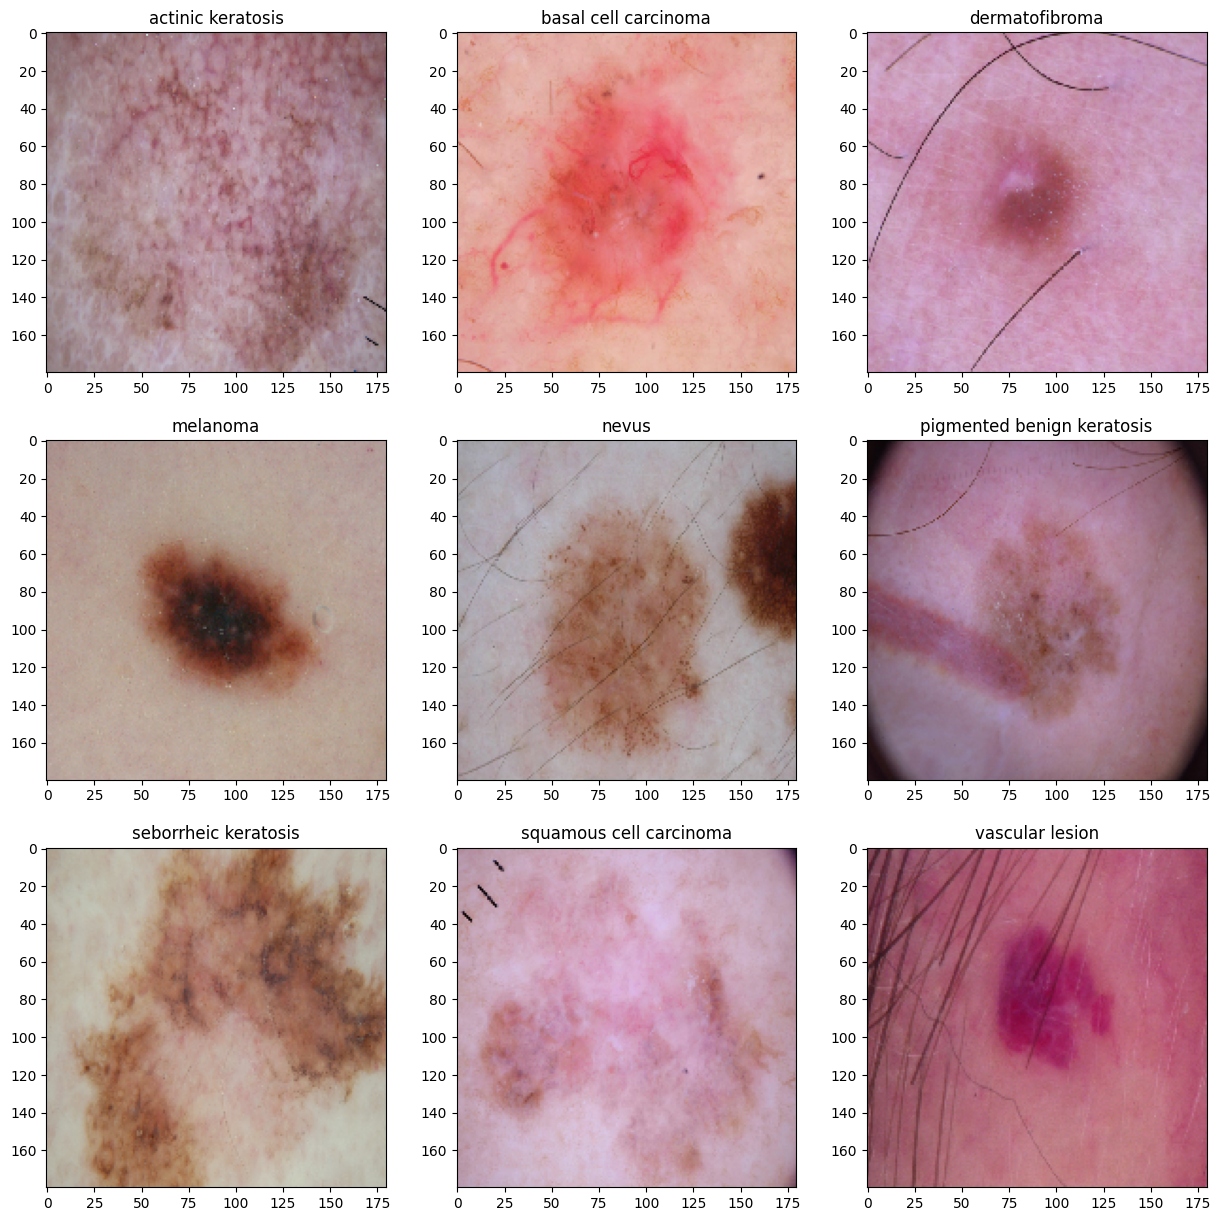

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
from tensorflow.keras.preprocessing.image import load_img
files_path_dict = {}
for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

# let's see the image
plt.figure(figsize=(15,15))
index = 0
for img_c in class_names:
    path_list = files_path_dict[img_c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(img_c)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
input_shape = (img_height,img_width,3)

# let's create model layer by layer
model = Sequential()

# first layer
model.add(layers.Rescaling(1./255, input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# second layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# third layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())

# dense layer 1
model.add(layers.Dense(512,activation='relu'))

# dense layer 2
model.add(layers.Dense(128,activation='relu'))


# dense layer 3 with activation function we are going to use is softmax as that scales numbers into probabilities
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam', # adam is optimiser
              loss='categorical_crossentropy', # this is loss function
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 274s 319ms/step - loss: 1.8516 - accuracy: 0.3027 - val_loss: 1.5177 - val_accuracy: 0.3935
Epoch 2/20
169/169 [==============================] - 2s 12ms/step - loss: 1.4490 - accuracy: 0.4534 - val_loss: 1.3133 - val_accuracy: 0.4981
Epoch 3/20
169/169 [==============================] - 2s 12ms/step - loss: 1.2203 - accuracy: 0.5397 - val_loss: 1.2396 - val_accuracy: 0.5360
Epoch 4/20
169/169 [==============================] - 2s 12ms/step - loss: 1.0327 - accuracy: 0.6194 - val_loss: 0.9980 - val_accuracy: 0.6281
Epoch 5/20
169/169 [==============================] - 2s 12ms/step - loss: 0.8323 - accuracy: 0.6971 - val_loss: 0.9105 - val_accuracy: 0.6778
Epoch 6/20
169/169 [==============================] - 2s 12ms/step - loss: 0.5916 - accuracy: 0.7800 - val_loss: 0.8563 - val_accuracy: 0.7112
Epoch 7/20
169/169 [==============================] - 2s 12ms/step - loss: 0.4523 - accuracy: 0.8355 - val_loss: 0.8417 - val_accuracy: 0.7

### Visualizing training results

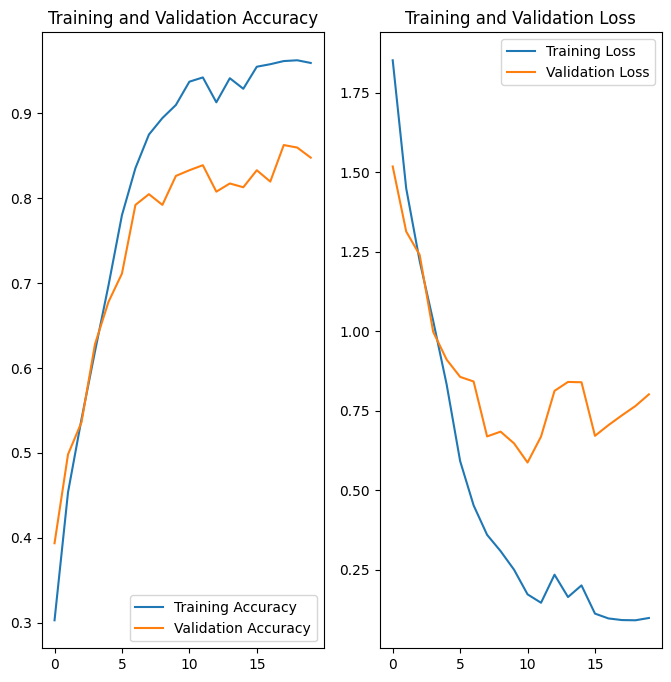

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Findings :

- Looks like model is overfitting
- epoch increases the difference between training and validation accuracy increases

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomTranslation

# augmentation strategy.
rescale = tf.keras.Sequential([
  # To rescale input
  Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomTranslation(0.1, 0.1)
])

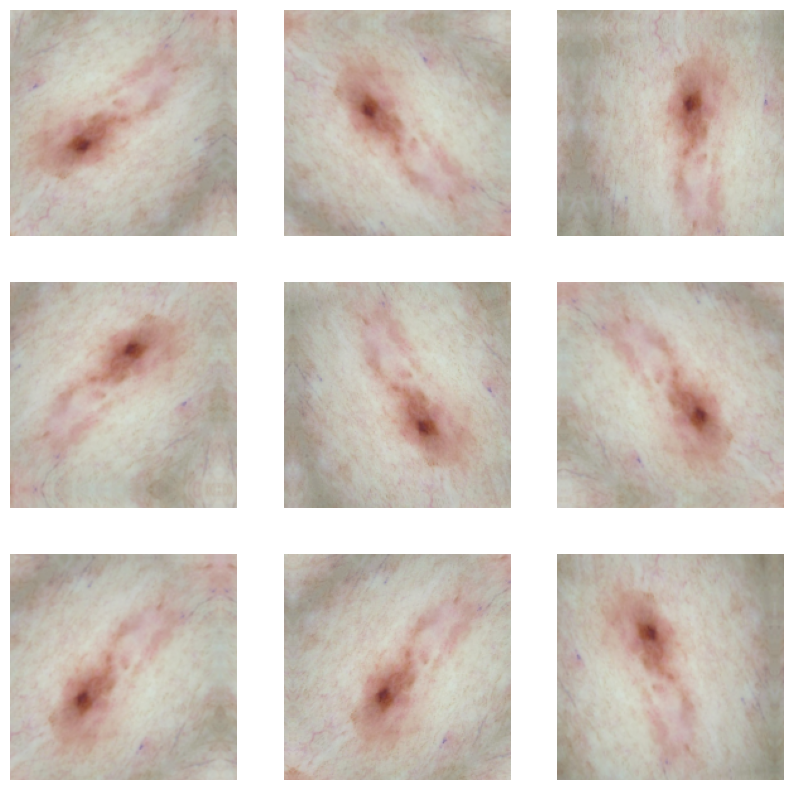

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# augmentated images visualization
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# second model (model2)

model2 = Sequential()
model2.add(data_augmentation)
model2.add(rescale)

# first convulation with dropout
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25))

# second convulation with dropout
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25))

# third convulation
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))


In [20]:
# flatten the multi dimensional input
model2.add(layers.Flatten())

# dense layer 1
model2.add(layers.Dense(512,activation='relu'))

# dense layer 2
model2.add(layers.Dense(218,activation='relu'))

# dropout with 50%
model2.add(layers.Dropout(0.50))

# dense layer 3 with activation function we are going to use is softmax as that scales numbers into probabilities
model2.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model

In [21]:
## Your code goes here
model2.compile(optimizer='Adam', # adam is optimiser
              loss='categorical_crossentropy', # this is loss function
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1) ## training code

Epoch 1/20
169/169 [==============================] - 8s 18ms/step - loss: 2.2173 - accuracy: 0.1767 - val_loss: 2.0241 - val_accuracy: 0.2108
Epoch 2/20
169/169 [==============================] - 2s 15ms/step - loss: 1.8917 - accuracy: 0.2589 - val_loss: 1.8176 - val_accuracy: 0.2791
Epoch 3/20
169/169 [==============================] - 2s 15ms/step - loss: 1.7060 - accuracy: 0.3535 - val_loss: 1.6702 - val_accuracy: 0.3831
Epoch 4/20
169/169 [==============================] - 2s 15ms/step - loss: 1.5924 - accuracy: 0.3898 - val_loss: 1.5684 - val_accuracy: 0.4120
Epoch 5/20
169/169 [==============================] - 3s 15ms/step - loss: 1.5324 - accuracy: 0.4188 - val_loss: 1.5491 - val_accuracy: 0.4291
Epoch 6/20
169/169 [==============================] - 3s 15ms/step - loss: 1.5562 - accuracy: 0.4050 - val_loss: 1.4773 - val_accuracy: 0.4157
Epoch 7/20
169/169 [==============================] - 2s 15ms/step - loss: 1.4743 - accuracy: 0.4366 - val_loss: 1.4655 - val_accuracy: 0.4388

### Visualizing the results

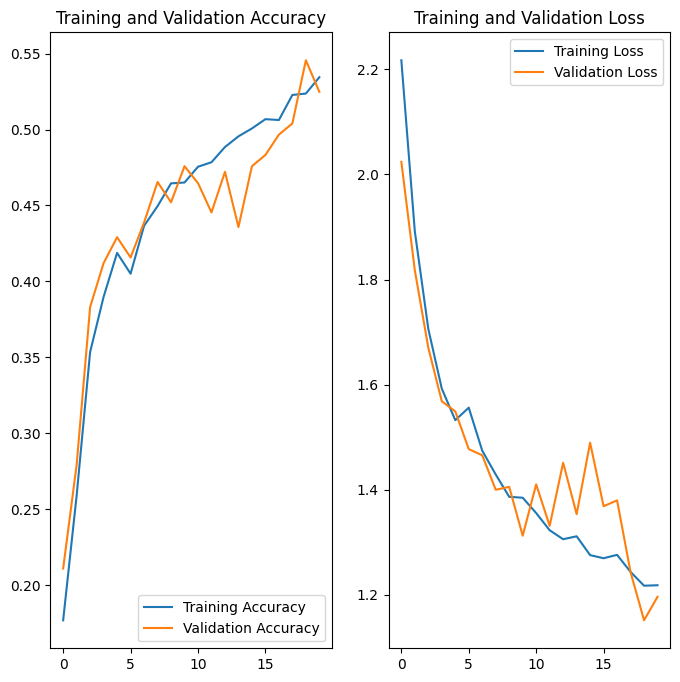

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Findings :

- Data augmentation and dropout layer's overfitting issue is reduced
- No increment in model performance.
- Let's check distribution of classes for imbalance in below step

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.

# check for imbalance
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    # get name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class ', 'No. of Image'])

# for train dataset
df = class_distribution_count(data_dir_train)
df


,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class '>

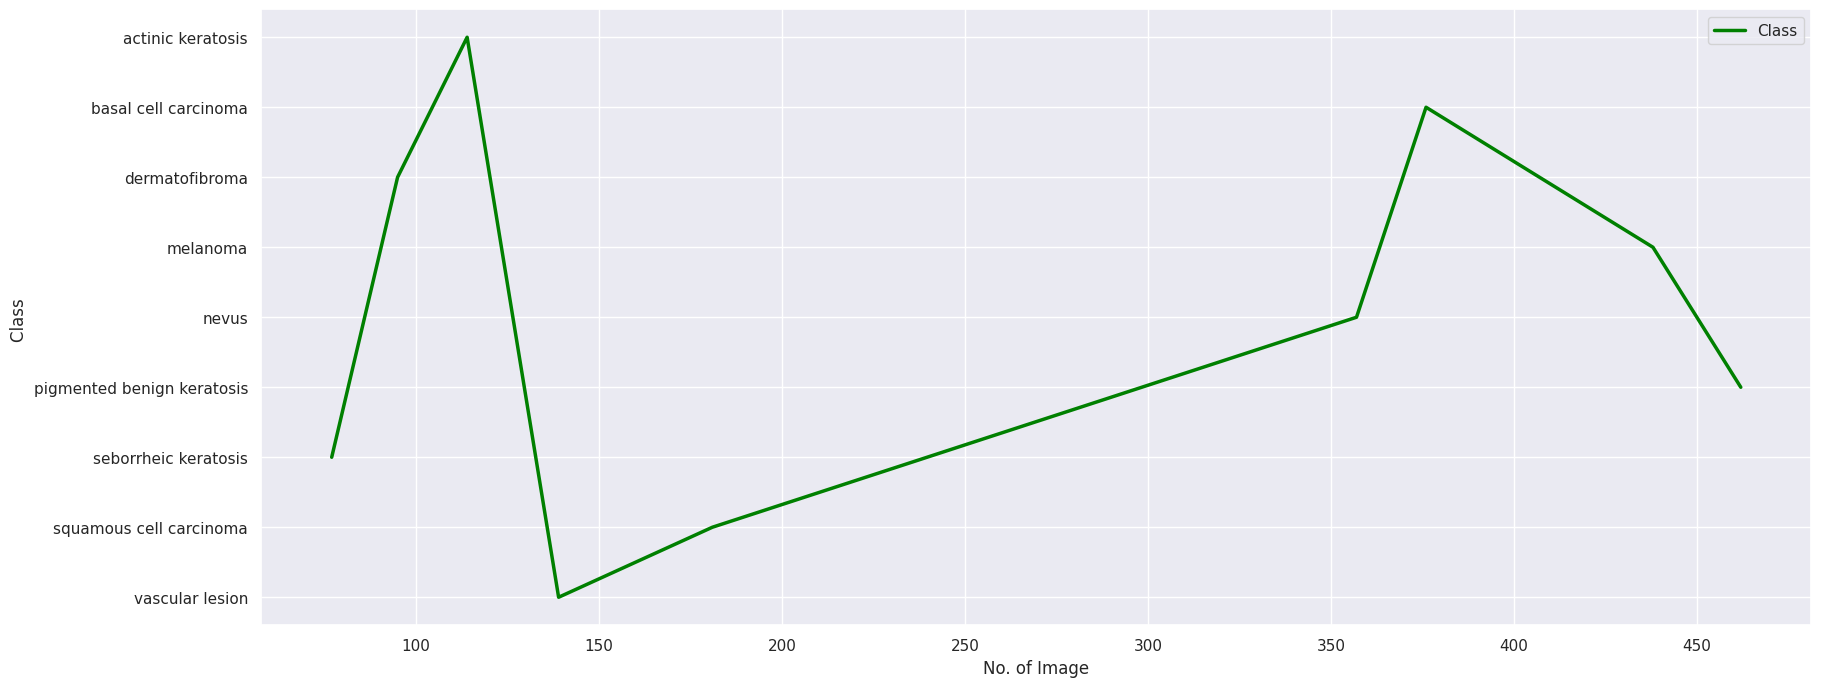

In [28]:
# let's visualize also
import seaborn as sns

width = 20
height = 8
sns.set(rc={'figure.figsize': (width, height)})

# Use the correct column name 'Class ' (with a space)
sns.lineplot(x="No. of Image", y="Class ", data=df,
             label="Class", linewidth=2.5, color='green')

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
---------------

#### Findings :

- After looking at graph it seems Seborrheic Keratosis has the least number of samples
- After looking as graph it seems Pigmented benign keratosis & Melanoma Dominates the data in terms of proportionate number of samples.



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B31E6967CD0>: 100%|██████████| 500/500 [00:04<00:00, 110.79 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B31E6A35D20>: 100%|██████████| 500/500 [00:05<00:00, 93.36 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B31E68C6350>: 100%|██████████| 500/500 [00:04<00:00, 106.63 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B31E6940220>: 100%|██████████| 500/500 [00:13<00:00, 35.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B32A83263E0>: 100%|██████████| 500/500 [00:12<00:00, 39.14 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B32CF78BA30>: 100%|██████████| 500/500 [00:04<00:00, 110.59 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B32A85F85B0>: 100%|██████████| 500/500 [00:06<00:00, 71.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B32E76D7460>: 100%|██████████| 500/500 [00:04<00:00, 106.05 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B32A0508880>: 100%|██████████| 500/500 [00:04<00:00, 107.89 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [36]:
df2['Label'].value_counts()

Label
actinic keratosis             1000
basal cell carcinoma          1000
dermatofibroma                1000
melanoma                      1000
nevus                         1000
pigmented benign keratosis    1000
seborrheic keratosis          1000
squamous cell carcinoma       1000
vascular lesion               1000
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width), label_mode='categorical',
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width), label_mode='categorical',
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
## your code goes here

# model 3 (model3)

model3 = Sequential()
model3.add(rescale)

# first convulation with dropout
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

# second convulation with dropout
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

# third convulation
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

In [41]:
# flatten the layer
model3.add(layers.Flatten())

# dense layer 1 with dropout
model3.add(layers.Dense(512,activation='relu'))
model3.add(layers.Dropout(0.25))

# layer normalization using batch
model3.add(layers.BatchNormalization())

# dense layer 2 with dropout
model3.add(layers.Dense(128,activation='relu'))
model3.add(layers.Dropout(0.50))

# layer normalization using batch
model3.add(layers.BatchNormalization())

# dense layer 3 with activation function we are going to use is softmax as that scales numbers into probabilities
model3.add(layers.Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
## your code goes here
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [43]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1) # your model fit code

Epoch 1/30
281/281 [==============================] - 30s 90ms/step - loss: 2.1573 - accuracy: 0.2523 - val_loss: 3.2709 - val_accuracy: 0.1687
Epoch 2/30
281/281 [==============================] - 25s 88ms/step - loss: 1.5691 - accuracy: 0.3992 - val_loss: 1.5908 - val_accuracy: 0.3916
Epoch 3/30
281/281 [==============================] - 25s 88ms/step - loss: 1.3908 - accuracy: 0.4670 - val_loss: 1.3554 - val_accuracy: 0.4927
Epoch 4/30
281/281 [==============================] - 25s 87ms/step - loss: 1.2956 - accuracy: 0.5168 - val_loss: 1.3002 - val_accuracy: 0.5145
Epoch 5/30
281/281 [==============================] - 25s 88ms/step - loss: 1.2057 - accuracy: 0.5453 - val_loss: 1.2593 - val_accuracy: 0.5452
Epoch 6/30
281/281 [==============================] - 25s 88ms/step - loss: 1.0845 - accuracy: 0.5939 - val_loss: 1.1400 - val_accuracy: 0.5995
Epoch 7/30
281/281 [==============================] - 25s 87ms/step - loss: 1.0262 - accuracy: 0.6250 - val_loss: 1.0357 - val_accuracy:

#### **Todo:**  Visualize the model results

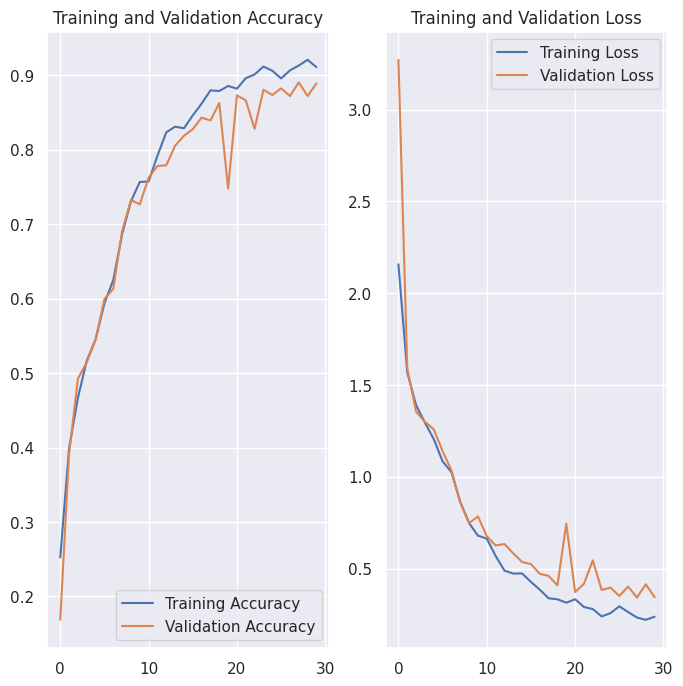

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Findings :

- In model 3 accuracy has increased between Training and Validation
- Class has rebalanced which helps in achieving the training and validation accuracy
- Overfitting issue is resolved